In [1]:
from os import path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('science')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
filename = 'dataset.h5'
keyname = '20simpleHam_noise'
filepath = path.abspath(path.join(path.abspath(''), "..", "..", f"main/data/{filename}"))
dataset = pd.read_hdf(filepath, keyname)

In [3]:
X, y = np.array(dataset["spectrum"].tolist()), np.array(
    [dataset["aFieldStrength"].tolist(), dataset["b"].tolist(), dataset["c"].tolist()])

# only scale parameters not spectra
sc0, sc1, sc2 = StandardScaler().fit(y[0].reshape(-1, 1)), StandardScaler().fit(
    y[1].reshape(-1, 1)), StandardScaler().fit(y[2].reshape(-1, 1))
# concatenate scaled parameters and split into training and test set
y = np.array([sc0.transform(y[0].reshape(-1, 1)), sc1.transform(y[1].reshape(-1, 1)),
              sc2.transform(y[2].reshape(-1, 1))]).T.reshape(-1, 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [5]:
# Evaluate Model on Test Set
y_pred = regressor.predict(X_test)
absoluteerror = y_pred-y_test
print(np.mean(abs(absoluteerror)))
print(np.std(abs(absoluteerror)))

0.2577249634423034
0.8942479496910438


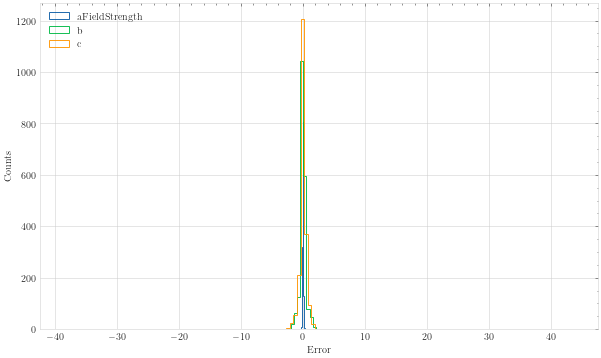

In [59]:
plt.figure(figsize=(10,6), facecolor='white')
plt.hist(absoluteerror.T[0],bins=100,alpha = 0.9,label = 'aFieldStrength',histtype = 'step')
plt.hist(absoluteerror.T[1],bins=100,alpha = 0.9,label = 'b',histtype = 'step')
plt.hist(absoluteerror.T[2],bins=100,alpha = 0.9,label = 'c',histtype = 'step')

#plt.title('Error distributions before inverse scaling')
plt.xlabel('Error')
plt.ylabel('Counts')
plt.legend()
plt.savefig('images/edlinearreg.png', dpi=300)

0.8942479496910438


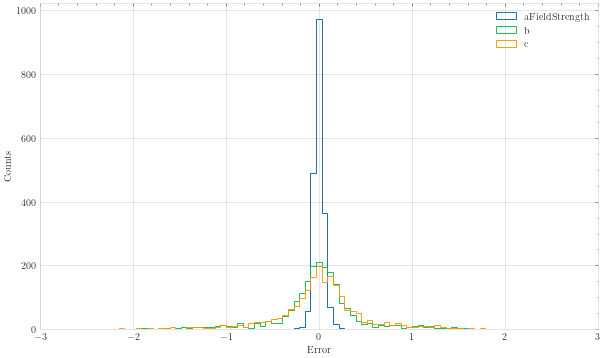

In [60]:
print(np.std(abs(absoluteerror)))
plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(absoluteerror.T[0][np.where(np.abs(absoluteerror.T[0])<5)], bins=np.linspace(-3,3,100), alpha=0.9, label='aFieldStrength', histtype='step')
plt.hist(absoluteerror.T[1][np.where(np.abs(absoluteerror.T[1])<5)], bins=np.linspace(-3,3,100), alpha=0.9, label='b', histtype='step')
plt.hist(absoluteerror.T[2][np.where(np.abs(absoluteerror.T[2])<5)], bins=np.linspace(-3,3,100), alpha=0.9, label='c', histtype='step')

#plt.title('Error distributions before inverse scaling')
plt.xlabel('Error')
plt.ylabel('Counts')
plt.xlim(-3,3)
plt.legend()
plt.savefig('images/edlinearregzoom.png', dpi=300)

In [62]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred,multioutput='raw_values'))
print(r2_score(y_test,y_pred))

[ 0.98669043 -0.20940342 -0.4033505 ]
0.12464550578234897


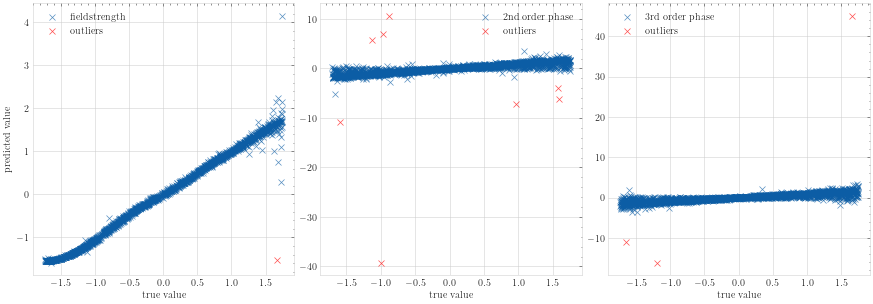

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5),sharey=False,sharex=False)
plt.subplots_adjust(wspace=0.1, hspace=0.05)
#fig.suptitle('Absorption spectrum with different noise level')

n = 1
ax1.scatter(x=y_test[:,0][np.where(np.abs(absoluteerror.T[0])<3)],y = y_pred[:,0][np.where(np.abs(absoluteerror.T[0])<3)],label = 'fieldstrength',marker= 'x',linewidths= 0.7,alpha = 0.7)
ax2.scatter(x=y_test[:,1][np.where(np.abs(absoluteerror.T[1])<5)],y = y_pred[:,1][np.where(np.abs(absoluteerror.T[1])<5)],label = '2nd order phase',marker= 'x',linewidths= 0.7,alpha = 0.7)
ax3.scatter(x=y_test[:,2][np.where(np.abs(absoluteerror.T[2])<5)],y = y_pred[:,2][np.where(np.abs(absoluteerror.T[2])<5)],label = '3rd order phase',marker= 'x',linewidths= 0.7,alpha = 0.7)
ax1.scatter(x=y_test[:,0][np.where(np.abs(absoluteerror.T[0])>3)],y = y_pred[:,0][np.where(np.abs(absoluteerror.T[0])>3)],label = 'outliers',marker= 'x',linewidths= 0.7,alpha = 0.7,color = 'red')
ax2.scatter(x=y_test[:,1][np.where(np.abs(absoluteerror.T[1])>5)],y = y_pred[:,1][np.where(np.abs(absoluteerror.T[1])>5)],label = 'outliers',marker= 'x',linewidths= 0.7,alpha = 0.7,color = 'red')
ax3.scatter(x=y_test[:,2][np.where(np.abs(absoluteerror.T[2])>5)],y = y_pred[:,2][np.where(np.abs(absoluteerror.T[2])>5)],label = 'outliers',marker= 'x',linewidths= 0.7,alpha = 0.7,color = 'red')


ax1.legend()
ax2.legend()
ax3.legend()


ax1.set_xlabel('true value')
ax2.set_xlabel('true value')
ax3.set_xlabel('true value')

ax1.set_ylabel('predicted value')
#ax2.set_ylabel('intensity')
#ax3.set_ylabel('intensity')
#ax4.set_ylabel('intensity')
fig.savefig('images/pvtlinear.png', dpi=300)


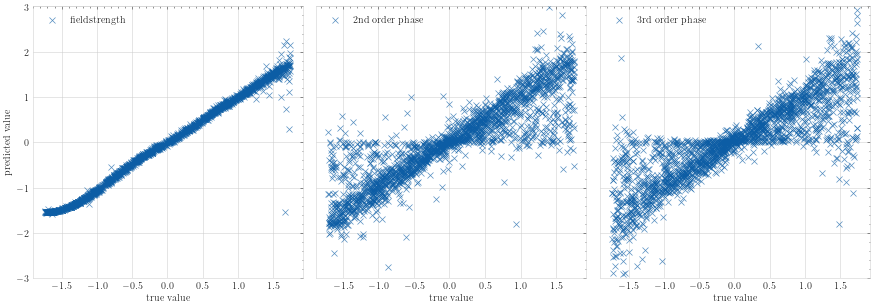

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5),sharey=True,sharex=False)
plt.subplots_adjust(wspace=0.05, hspace=0.05)
#fig.suptitle('Absorption spectrum with different noise level')

ax1.scatter(x=y_test[:,0][np.where(np.abs(absoluteerror.T[0])<5)],y = y_pred[:,0][np.where(np.abs(absoluteerror.T[0])<5)],label = 'fieldstrength',marker= 'x',linewidths= 0.7,alpha = 0.7)
ax2.scatter(x=y_test[:,1][np.where(np.abs(absoluteerror.T[1])<5)],y = y_pred[:,1][np.where(np.abs(absoluteerror.T[1])<5)],label = '2nd order phase',marker= 'x',linewidths= 0.7,alpha = 0.7)
ax3.scatter(x=y_test[:,2][np.where(np.abs(absoluteerror.T[2])<5)],y = y_pred[:,2][np.where(np.abs(absoluteerror.T[2])<5)],label = '3rd order phase',marker= 'x',linewidths= 0.7,alpha = 0.7)

ax1.legend(loc = 'upper left')
ax2.legend()
ax3.legend()

ax1.set_ylim(-3,3)
ax1.set_xlabel('true value')
ax2.set_xlabel('true value')
ax3.set_xlabel('true value')

ax1.set_ylabel('predicted value')
#ax2.set_ylabel('intensity')
#ax3.set_ylabel('intensity')
#ax4.set_ylabel('intensity')
fig.savefig('images/pvtlinearzoom.png', dpi=300)